In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt

In [7]:
# print(os.getcwd())
# df = pd.read_csv('../../data/results.csv')
big = pd.read_csv('../../data/results-biggraph.csv')
df50 = pd.read_csv('../../data/results.csv')
sssp = pd.read_csv('../../data/results-sssp.csv')
nopq = pd.read_csv('../../data/results-zeropq.csv')
pert = pd.read_csv('../../data/results-sssp-perturbations.csv')

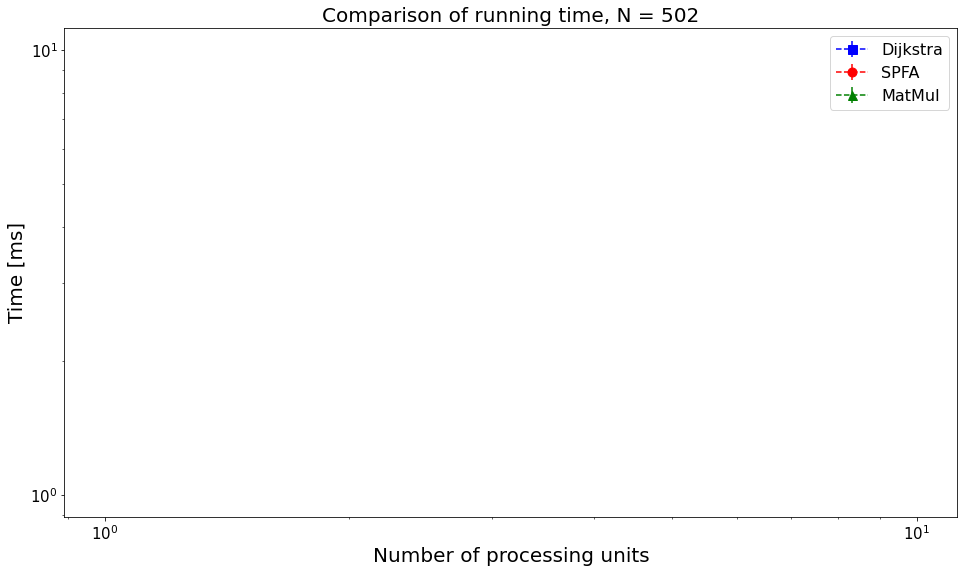

In [94]:
def calc_yerr(x):
    return 0.20*x

main_methods = ['dijkstra', 'SPFA', 'MatMul']
titles = ['Dijkstra', 'SPFA', 'MatMul']
graph_size = 502
style = ['b--s', 'r--o', 'g--^']

fig, ax = plt.subplots()
fig.set_size_inches(16, 9)
plt.xlabel('Number of processing units', fontsize=20)
plt.ylabel('Time [ms]', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Comparison of running time, N = 502', fontsize=20)

for i in range(3):
    m = main_methods[i]
    f = big[(big['method'] == m) & (big['N']==graph_size)]
    ax.set_yscale('log')
    ax.set_xscale('log')
    ys = f['execution_time'].to_numpy()
    ax.errorbar(f['P'], f['execution_time'], yerr=calc_yerr(ys), fmt=style[i], markersize=9, label=titles[i])

ax.legend(fontsize=16);

plt.show()

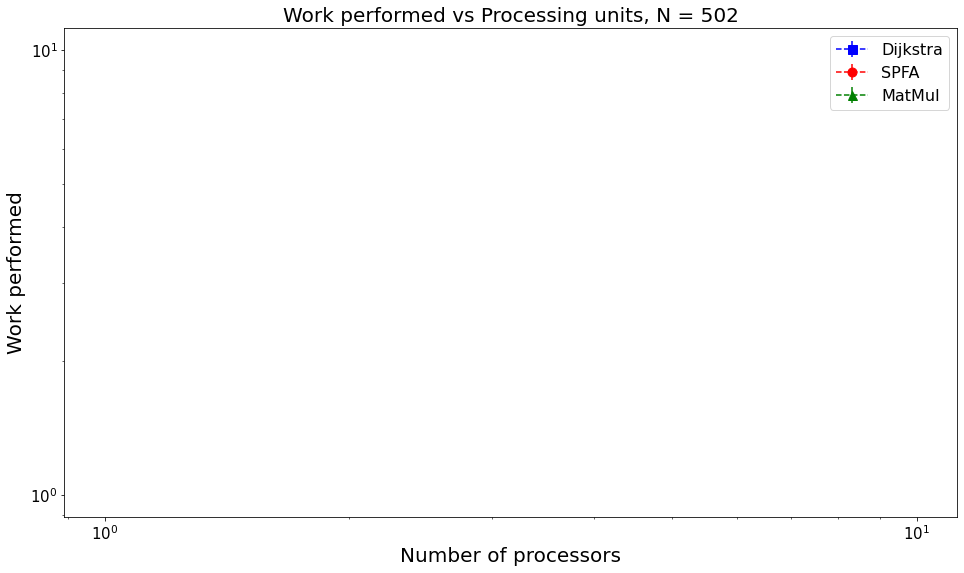

In [4]:
main_methods = ['dijkstra', 'SPFA', 'MatMul']
titles = ['Dijkstra', 'SPFA', 'MatMul']
graph_size = 502
style = ['b--s', 'r--o', 'g--^']

fig, ax = plt.subplots()
fig.set_size_inches(16, 9)
plt.xlabel('Number of processors', fontsize=20)
plt.ylabel('Work performed', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Work performed vs Processing units, N = 502', fontsize=20)

for i in range(3):
    m = main_methods[i]
    f = big[(big['method'] == m) & (big['N']==graph_size)]
    ax.set_yscale('log')
    ax.set_xscale('log')
    ys = f['work_performed'].to_numpy()
    ax.errorbar(f['P'], f['work_performed'], yerr=calc_yerr(ys), fmt=style[i], markersize=9, label=titles[i])

ax.legend(fontsize=16);

plt.show()

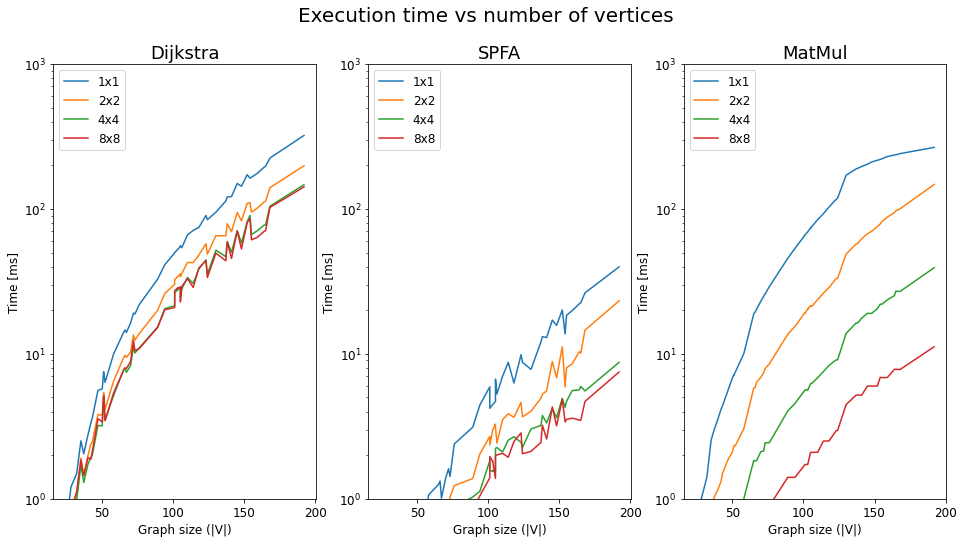

In [95]:
# Time graphs
m_df = df50
main_methods = ['dijkstra', 'SPFA', 'MatMul']
titles = ['Dijkstra', 'SPFA', 'MatMul']
# style = ['b--s', 'r--o', 'g--^']   # representing number of cores
cores = ['0','1x1', '2x2', '3x3', '4x4', '5x5', '6x6', '7x7', '8x8']
core_numbers = [1,2,4,8]

matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 
fig, ax = plt.subplots(nrows = 1, ncols = 3)
fig.set_size_inches(16, 8)
fig.suptitle('Execution time vs number of vertices', fontsize=20, y=0.98)


for i in range(3):
    m = main_methods[i]
    for j in core_numbers:
        f = m_df[(m_df['method'] == m) & (m_df['P'] == j*j)].sort_values(by=['N'])
        ax[i].set_title(titles[i], fontsize=18)
        ax[i].set_xlabel('Graph size (|V|)', fontsize=12)
        ax[i].set_ylabel('Time [ms]', fontsize=12)    
        ax[i].set_ylim(1,1000)
        ax[i].set_yscale('log')
        ax[i].plot(f['N'], f['execution_time'], markersize=9, label=cores[j])
        
    ax[i].legend(fontsize=12, loc='upper left')

plt.show()

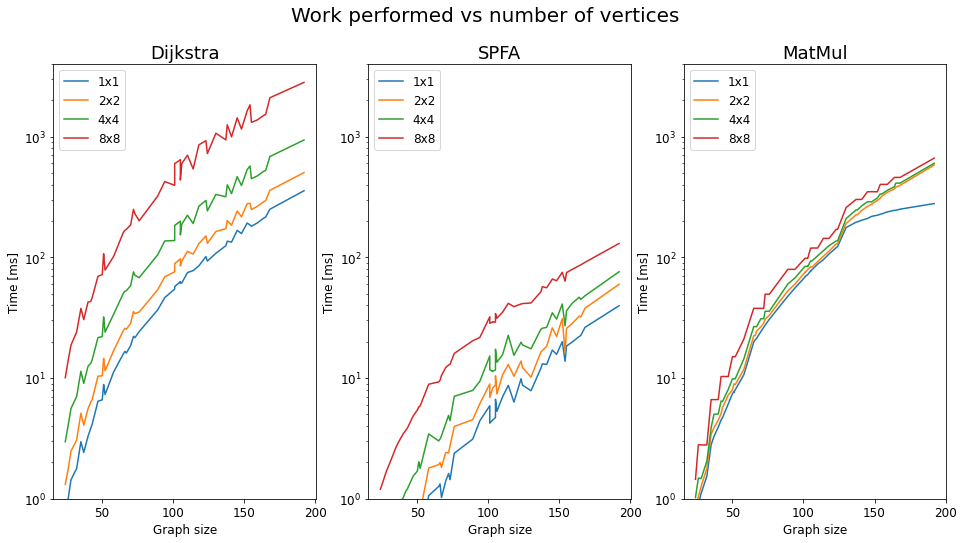

In [96]:
# Work performed graphs
m_df = df50
main_methods = ['dijkstra', 'SPFA', 'MatMul']
titles = ['Dijkstra', 'SPFA', 'MatMul']
# style = ['b--s', 'r--o', 'g--^']   # representing number of cores
cores = ['0','1x1', '2x2', '3x3', '4x4', '5x5', '6x6', '7x7', '8x8']
core_numbers = [1,2,4,8]

matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 
fig, ax = plt.subplots(nrows = 1, ncols = 3)
fig.set_size_inches(16, 8)
fig.suptitle('Work performed vs number of vertices', fontsize=20)


for i in range(3):
    m = main_methods[i]
    for j in core_numbers:
        f = m_df[(m_df['method'] == m) & (m_df['P'] == j*j)].sort_values(by=['N'])
        ax[i].set_title(titles[i], fontsize=18)
        ax[i].set_xlabel('Graph size', fontsize=12)
        ax[i].set_ylabel('Time [ms]', fontsize=12)    
        ax[i].set_ylim(1,4000)
        ax[i].set_yscale('log')
        ax[i].plot(f['N'], f['work_performed'], markersize=9, label=cores[j])
        
    ax[i].legend(fontsize=12, loc='upper left')

plt.show()

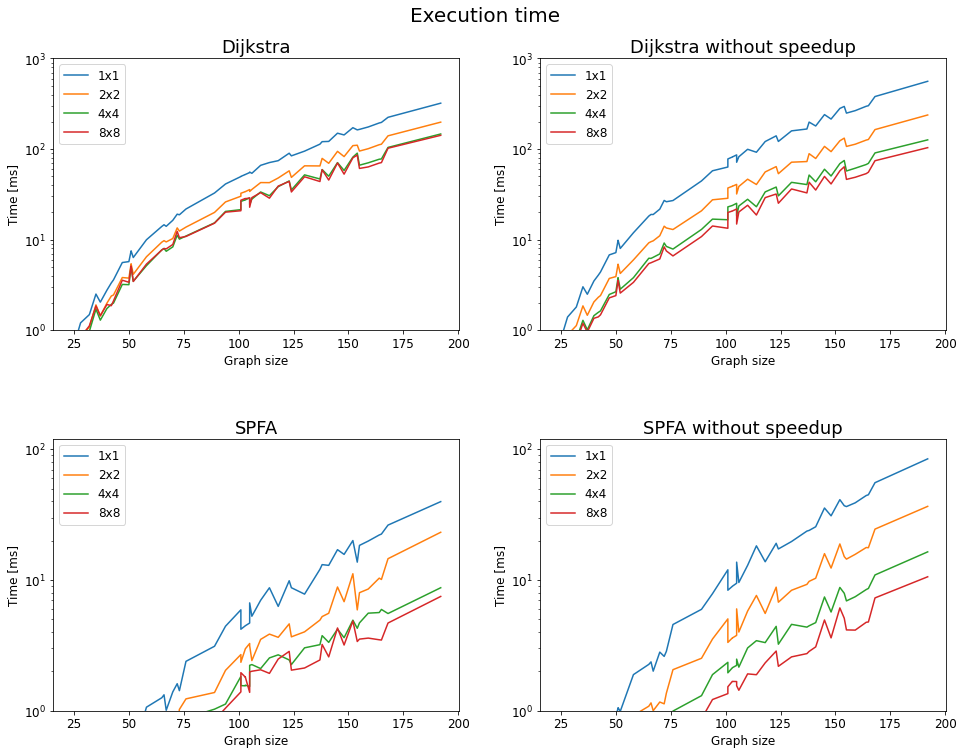

In [97]:
# Time graphs
m_df = df50
main_methods = ['dijkstra','dijkstra_nospeedup', 'SPFA','SPFA_nospeedup']
titles = ['Dijkstra', 'Dijkstra without speedup', 'SPFA', 'SPFA without speedup']
cores = ['0','1x1', '2x2', '3x3', '4x4', '5x5', '6x6', '7x7', '8x8']
core_numbers = [1,2,4,8]

matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 
fig, ax = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(16, 12)
fig.suptitle('Execution time', fontsize=20, y=0.94)


for r in range(2):
    for c in range(2):
        m = main_methods[2*r+c]
        ax[r][c].set_title(titles[2*r+c], fontsize=18)
        ax[r][c].set_xlabel('Graph size', fontsize=12)
        ax[r][c].set_ylabel('Time [ms]', fontsize=12)    
        if r == 0: 
            ax[r][c].set_ylim(1,1000)
        else:
            ax[r][c].set_ylim(1,120)
        ax[r][c].set_yscale('log')

        for j in core_numbers:
            f = m_df[(m_df['method'] == m) & (m_df['P'] == j*j)].sort_values(by=['N'])
            ax[r][c].plot(f['N'], f['execution_time'], markersize=9, label=cores[j])

        ax[r][c].legend(fontsize=12, loc='upper left')
plt.subplots_adjust(hspace = 0.4)
plt.show()

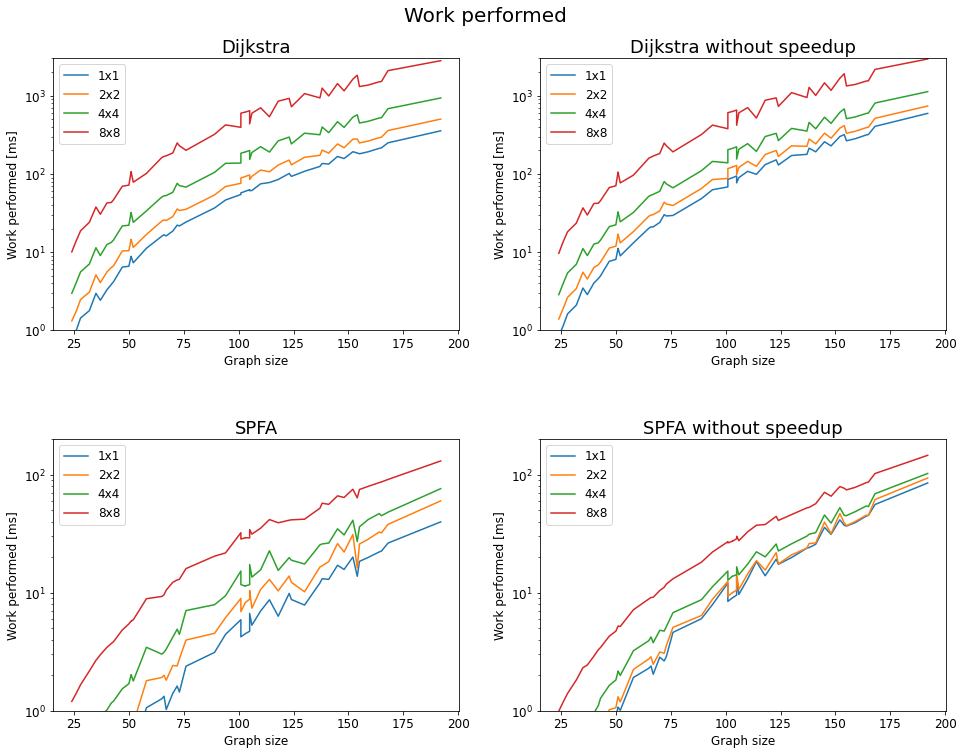

In [98]:
# Work graphs
m_df = df50
main_methods = ['dijkstra','dijkstra_nospeedup', 'SPFA','SPFA_nospeedup']
titles = ['Dijkstra', 'Dijkstra without speedup', 'SPFA', 'SPFA without speedup']
cores = ['0','1x1', '2x2', '3x3', '4x4', '5x5', '6x6', '7x7', '8x8']
core_numbers = [1,2,4,8]

matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 
fig, ax = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(16, 12)
fig.suptitle('Work performed', fontsize=20, y=0.94)


for r in range(2):
    for c in range(2):
        m = main_methods[2*r+c]
        ax[r][c].set_title(titles[2*r+c], fontsize=18)
        ax[r][c].set_xlabel('Graph size', fontsize=12)
        ax[r][c].set_ylabel('Work performed [ms]', fontsize=12)    
        if r == 0: 
            ax[r][c].set_ylim(1,3000)
        else:
            ax[r][c].set_ylim(1,200)
        ax[r][c].set_yscale('log')

        for j in core_numbers:
            f = m_df[(m_df['method'] == m) & (m_df['P'] == j*j)].sort_values(by=['N'])
            ax[r][c].plot(f['N'], f['work_performed'], markersize=9, label=cores[j])

        ax[r][c].legend(fontsize=12, loc='upper left')
plt.subplots_adjust(hspace = 0.4)
plt.show()

In [9]:
from scipy import stats

def verify_null_hypothesis(df, m1, m2):
    df = df.sort_values(by=['N'])
    graphs = df['N'].values
    
    d1 = df[df['method'] == m1].reset_index(drop=True)
    d2 = df[df['method'] == m2].reset_index(drop=True)
    
    N = len(d1)
    speedup_execution = (d1['execution_time'] < d2['execution_time']).sum()
    speedup_wp = (d1['work_performed'] < d2['work_performed']).sum()
    print(speedup_execution, speedup_wp)
    print('Null hypothesis probabilities for {}'.format(m1))
    print('Execution time p-value: {}'.format(stats.binom_test(speedup_execution, n=N, p=0.5, alternative='greater')))
    print('Work performed p-value: {}'.format(stats.binom_test(speedup_wp, n=N, p=0.5, alternative='greater')))  
    
verify_null_hypothesis(df50, 'dijkstra', 'dijkstra_nospeedup')
verify_null_hypothesis(df50, 'SPFA', 'SPFA_nospeedup')

88 116
Null hypothesis probabilities for dijkstra
Execution time p-value: 0.9615811839343732
Work performed p-value: 0.014062703616463062
116 131
Null hypothesis probabilities for SPFA
Execution time p-value: 0.014062703616463062
Work performed p-value: 6.928725786182036e-06


In [107]:
def make_plots(df, methods, column, graph_size):
    averaged = df.groupby(['method', 'N', 'M', 'P']).mean().reset_index()
    
    def calc_yerr(x):
        return 0.1*x

    style = ['b--s', 'r--o', 'g--^', 'y--8']

    fig, ax = plt.subplots()
    fig.set_size_inches(16, 9)
    plt.xlabel('Number of processing units', fontsize=20)
    plt.ylabel('Time [ms]', fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    #plt.title('Comparison of {} for the London network'.format(column.replace('_', ' ')), fontsize=20)

    for i in range(len(methods)):
        m = methods[i]
        f = averaged[(averaged['method'] == m) & (averaged['N']==graph_size)]
        ax.set_yscale('log')
        ys = f[column].to_numpy()
        ax.errorbar(f['P'], f[column], yerr=calc_yerr(ys), fmt=style[i], markersize=9, label=methods[i])

    ax.legend(fontsize=16);

    plt.show()


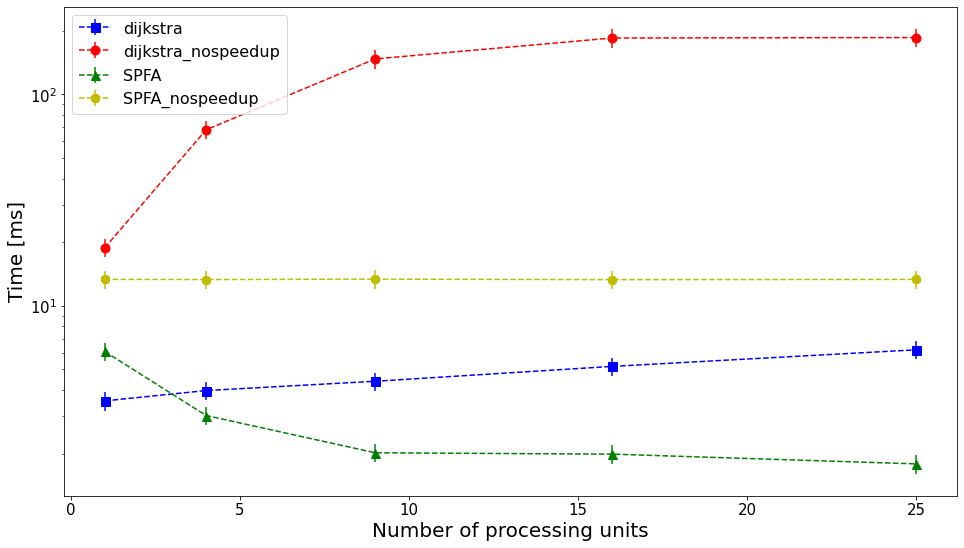

In [108]:
sizes = [3179, 6269, 43057, 126917]
make_plots(sssp, ['dijkstra', 'dijkstra_nospeedup', 'SPFA', 'SPFA_nospeedup'], 'work_performed', sizes[2])

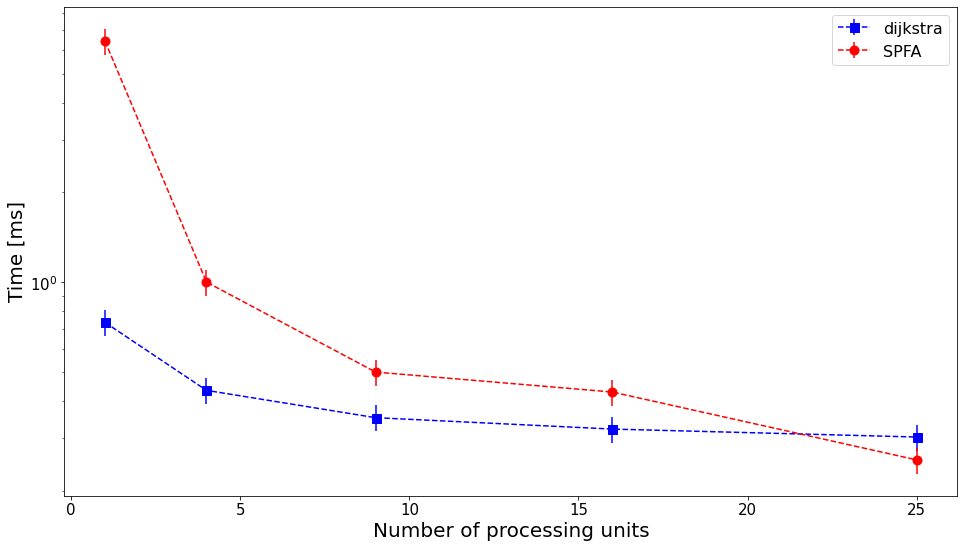

In [112]:
make_plots(nopq, ['dijkstra', 'SPFA'], 'execution_time', sizes[2])

In [135]:
def biplt(columns, data, labels, plt_name='<name>', size=(4,4), y_lable='Time',
         colors = ['navy', 'dodgerblue','purple', 'grey','green', 'red'], legend_loc = 'upper right'):
       
    x = (np.arange(len(columns)) + 0.3)
    fig, axes = plt.subplots(ncols=1, nrows=1)
    fig.set_size_inches(size)

    width = 0.5
    fsize = 15
    y_offset = np.zeros(len(columns))
       

    plt.title('%s' % plt_name, fontsize=18)

    for i in range(len(data)):
        axes.bar(x, data[i], width, bottom=y_offset, label=labels[i], color=colors[i])
        y_offset = y_offset + data[i]

    axes.set_xticks(x)
    axes.set_xticklabels(columns, fontsize=fsize)
   
    axes.tick_params(axis='y', labelsize=fsize)
    axes.set_ylabel(y_lable, fontsize=fsize)    
    plt.legend(fontsize=15, loc=legend_loc)
    plt.show()
   
def get_data(methods, coreN = 16):
    maxN = pert[pert['method']=='dijkstra']['N'].max()
    comm = np.array([])
    comput = np.array([])
    for m in methods:
        comm_t = pert[(pert['method']==m) & (pert['N'] == maxN) & (pert['P'] == coreN)]['comm_time'].mean()
        exec_t = pert[(pert['method']==m) & (pert['N'] == maxN) & (pert['P'] == coreN)]['execution_time'].mean()
        comput_t = exec_t-comm_t
        comm = np.append(comm, comm_t)
        comput = np.append(comput, comput_t)

    return np.array([comm, comput])

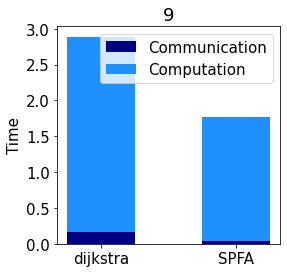

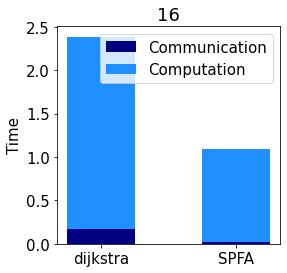

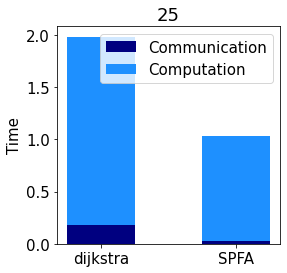

array([[0.17918168, 0.02215177],
       [1.80521482, 1.00688565]])

In [136]:

columns = ['dijkstra', 'SPFA']
l = ['Communication', 'Computation']

data = get_data(columns, coreN=9)
biplt(columns, data, labels=l, plt_name='9')
data = get_data(columns, coreN=16)
biplt(columns, data, labels=l, plt_name='16')
data = get_data(columns, coreN=25)
biplt(columns, data, labels=l, plt_name='25')
data

In [12]:
gaussian_runs = pd.read_csv('../../data/results-gaussianruns.csv')

In [13]:
means = gaussian_runs.groupby(['method', 'N', 'P']).mean().reset_index()
stds = gaussian_runs.groupby(['method', 'N', 'P']).std().reset_index()

percentages = stds['execution_time'] / means['execution_time']

In [14]:
percentages

0     0.000084
1     0.000123
2     0.000126
3     0.000215
4     0.000254
5     0.000511
6     0.001239
7     0.000932
8     0.000803
9     0.000858
10    0.000423
11    0.000712
12    0.001165
13    0.001238
14    0.000824
Name: execution_time, dtype: float64

In [10]:
def sensitivity_analysis():
    results = pd.read_csv('../../data/results-sensitivity.csv')
    special_columns = ['MEM', 'ALU', 'PACK', 'JOURNEY', 'PQ', 'WAIT']
    means = results.groupby(['method', 'N', 'P']).mean().reset_index()
    stds = results.groupby(['method', 'N', 'P']).std().reset_index()
    return means, stds
    
    
means, stds = sensitivity_analysis()
means

,method,N,P,execution_time,work_performed,MEM,ALU,PACK,JOURNEY,PQ,WAIT,speedup
0,Dijkstra,154,1,150.369304,166.842158,19.488479,3.371060,7.830302,24.918352,98.675972,37.479508,1.000000
1,Dijkstra,154,4,99.691281,238.235936,18.503359,3.371538,25.559614,78.285744,98.681697,92.121769,1.508350
2,Dijkstra,154,9,77.544184,324.297274,17.848471,3.372363,45.548750,137.925131,98.708870,158.823304,1.939144
3,Dijkstra,154,16,79.912073,465.854326,17.682361,3.372199,74.208074,227.322677,98.677882,271.905846,1.881685
4,Dijkstra,154,25,74.251433,641.679681,17.616502,3.367504,109.230546,338.957066,98.682123,412.764189,2.025137
5,MatMul,154,1,219.667918,227.869021,0.000000,207.262997,30.777206,0.001395,0.000000,1.926959,1.000000
6,MatMul,154,4,78.531587,308.342340,0.000000,207.261928,35.975488,0.010113,0.000000,9.690436,2.797223
7,MatMul,154,9,37.489957,325.223727,0.000000,210.144973,43.737823,0.020564,0.000000,8.240867,5.859408
8,MatMul,154,16,21.965128,334.279092,0.000000,210.142406,53.374729,0.035410,0.000000,7.614358,10.000796
9,MatMul,154,25,14.382633,338.234204,0.000000,208.693037,62.923125,0.054971,0.000000,7.226095,15.273165


In [203]:
def plot_all_times(cols, parts, P, labels, plt_name='', y_lable='y values', normalised=False):
    colors = ['#0b84a5', '#f6c85f','#6f4e7c', '#9dd866','#ca472f', '#ffa056']
    data = np.empty((len(parts), len(cols)))
    for i in range(len(cols)):
        method = cols[i]
        m = means[(means['method'] == method) & (means['P'] == P)]
        sum_cols = 1
        if normalised:
            sum_cols = (m[parts].sum(axis=1).values)[0]
        for j in range(len(parts)):
            data[j][i] = m.iloc[0][parts[j]]/sum_cols
    if not plt_name:
        plt_name = 'P={}'.format(P)
    biplt(cols, data, labels=labels, plt_name=plt_name, size=(9, 10), y_lable=y_lable, 
          colors=colors, legend_loc='lower right')

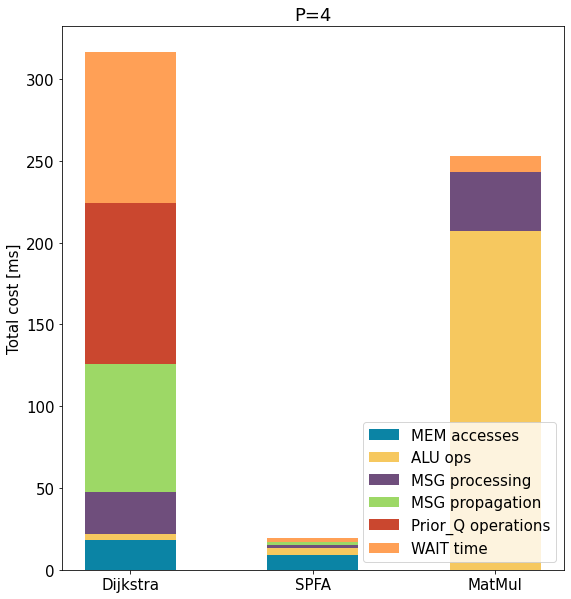

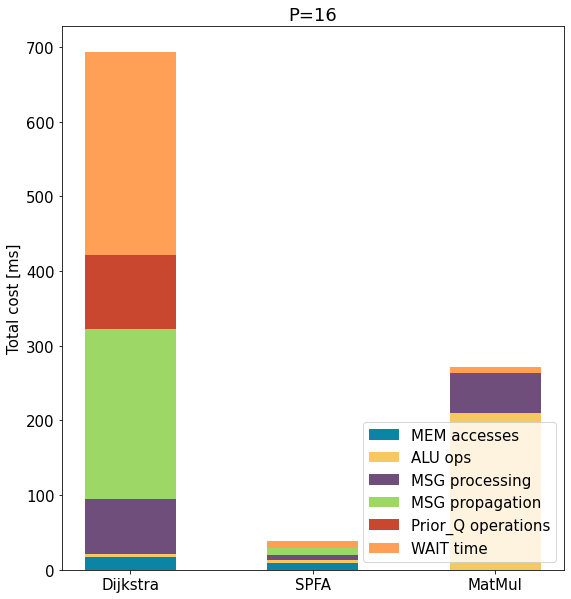

In [204]:
cols = ['Dijkstra', 'SPFA', 'MatMul']
lab = ['MEM', 'ALU', 'PACK', 'JOURNEY', 'PQ', 'WAIT']
labels = ['MEM accesses', 'ALU ops', 'MSG processing', 'MSG propagation', 'Prior_Q operations', 'WAIT time']

plot_all_times(cols, lab, P=4, labels=labels, normalised=False, y_lable="Total cost [ms]")
plot_all_times(cols, lab, P=16, labels=labels, normalised=False, y_lable="Total cost [ms]")



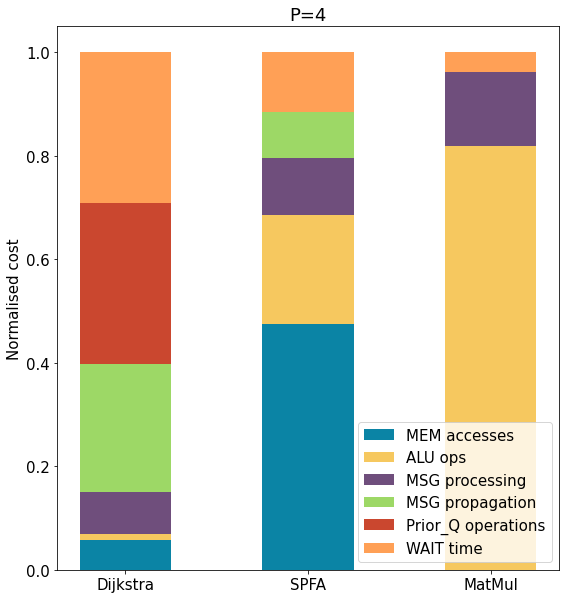

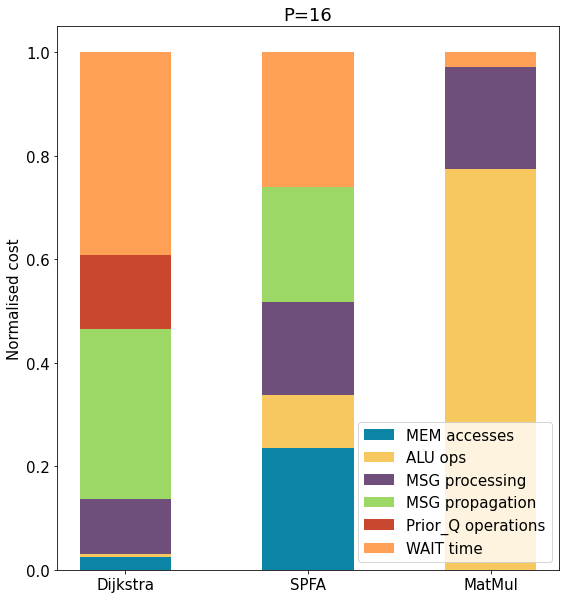

In [205]:
plot_all_times(cols, lab, P=4, labels=labels, normalised=True, y_lable="Normalised cost")
plot_all_times(cols, lab, P=16, labels=labels, normalised=True, y_lable="Normalised cost")